In [1]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
minist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = minist.load_data()
x_train, x_test = x_train/255., x_test/255.

print('training size', x_train.shape)
print('test size', x_test.shape)

training size (60000, 28, 28)
test size (10000, 28, 28)


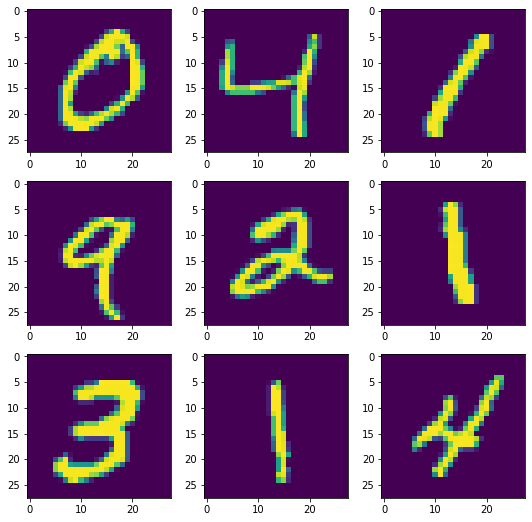

In [3]:
plt.figure(figsize=[9, 9])

for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(x_train[i])

## Model

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(10)
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In the model, we have `784` input features, and in the first layer, we have `128` nodes, so the corresponding weights $W$ and $b$ would have size $(783, 128)$ and $(128, 1)$, which, in total adds up to

$$ 784 \times 128 + 128 = 100480$$

Same goes with the `dense_3` layer.

__Note__: It is possible to bake this tf.nn.softmax in as the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output.

In [6]:
predictions = model(x_train[:1])
print(predictions.numpy())

[[ 0.15655103 -0.48250246  0.29978698 -0.6595523  -0.27254325  0.18561608
  -0.42510659  0.32197294 -0.18982276 -1.2221566 ]]


Transfor into probability using `softmax`.

In [7]:
predictions = tf.nn.softmax(predictions)
print(predictions.numpy())

[[0.13328804 0.07034832 0.15381466 0.05893347 0.08678365 0.1372189
  0.07450415 0.15726532 0.0942677  0.03357577]]


## Loss Function

In `SparseCategoricalCrossentropy`, labels are to be provided as integers

In [8]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.2661917

## Train

In [9]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 620us/step - loss: 0.2957 - accuracy: 0.9146
Epoch 2/5
1875/1875 [==============================] - 1s 610us/step - loss: 0.1434 - accuracy: 0.9573
Epoch 3/5
1875/1875 [==============================] - 1s 610us/step - loss: 0.1056 - accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 1s 621us/step - loss: 0.0878 - accuracy: 0.9729
Epoch 5/5
1875/1875 [==============================] - 1s 620us/step - loss: 0.0737 - accuracy: 0.9772


## Evaluate

In [11]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.0733 - accuracy: 0.9771


[0.0732896476984024, 0.9771000146865845]

## Predict

In [12]:
tf.argmax(model.predict(x_test[:5]), axis=-1).numpy()

array([7, 2, 1, 0, 4])